# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,precision_recall_curve,roc_curve,make_scorer

import warnings;
import numpy as np
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Overview

- Observations
- Sanity checks

In [ ]:
#Loading the dataset
data = pd.read_csv('/content/drive/MyDrive/MIT DS&ML/classification/ExtraaLearn.csv')

In [ ]:
#Understand the data by looking at the top 5 rows
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [ ]:
data.shape

(4612, 15)

The dataset has 4612 rows and 15 columns.

In [ ]:
#Checking the data type of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

We can see that there is no missing values in the columns of the dataset.

In [ ]:
#Look at the number of unique data
data.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

Age, website visits, time spent, and page views have much more unique values than the other features, which all have around 2-3 unique values.

ID can be dropped since it is unique for every customer and will not provide value to the model.

In [ ]:
# Dropping ID column
data.drop(columns='ID',inplace=True)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000




*  Age has mean 46, and median 51.
*  Website visits has mean 3.6, median 3.
*  Time spent on website has mean 724, and median 376, indicating the data is highly skewed to the right
*  Page views per visit has mean 3, and median 2.8
*  Status has mean 0.3, and median 0, more than 50% of lead do not convert to a paid customer.







In [ ]:
# Making a list of all catrgorical variables
cat_col=['current_occupation', 'first_interaction', 'profile_completed', 'last_activity',
         'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels',
         'referral', 'status']

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print('-'*50)

Professional    2616
Unemployed      1441
Student          555
Name: current_occupation, dtype: int64
--------------------------------------------------
Website       2542
Mobile App    2070
Name: first_interaction, dtype: int64
--------------------------------------------------
High      2264
Medium    2241
Low        107
Name: profile_completed, dtype: int64
--------------------------------------------------
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: last_activity, dtype: int64
--------------------------------------------------
No     4115
Yes     497
Name: print_media_type1, dtype: int64
--------------------------------------------------
No     4379
Yes     233
Name: print_media_type2, dtype: int64
--------------------------------------------------
No     4085
Yes     527
Name: digital_media, dtype: int64
--------------------------------------------------
No     3907
Yes     705
Name: educational_channels, dtype: int64
--------------------------



*   Almost 9 out of 10 leads have not seen the ad on printed media
*   8 out of 9 leads have not seen the ad on digital platform
*   More people have heard about ExtraaLearn through educational channels than ads
*   1377 leads convert vs 3235 leads who don't





In [ ]:
#Converting the categorical variables into category variables
for column in cat_col:
    data[column]=data[column].astype('category')

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

### Observation on continuous variables

In [ ]:
def hist_box(data, col):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(12, 6))
    # Adding a graph in each part
    sns.boxplot(data=data, x=col, ax=ax_box, showmeans=True)
    sns.histplot(data=data, x=col, kde=True, ax=ax_hist)
    plt.show()

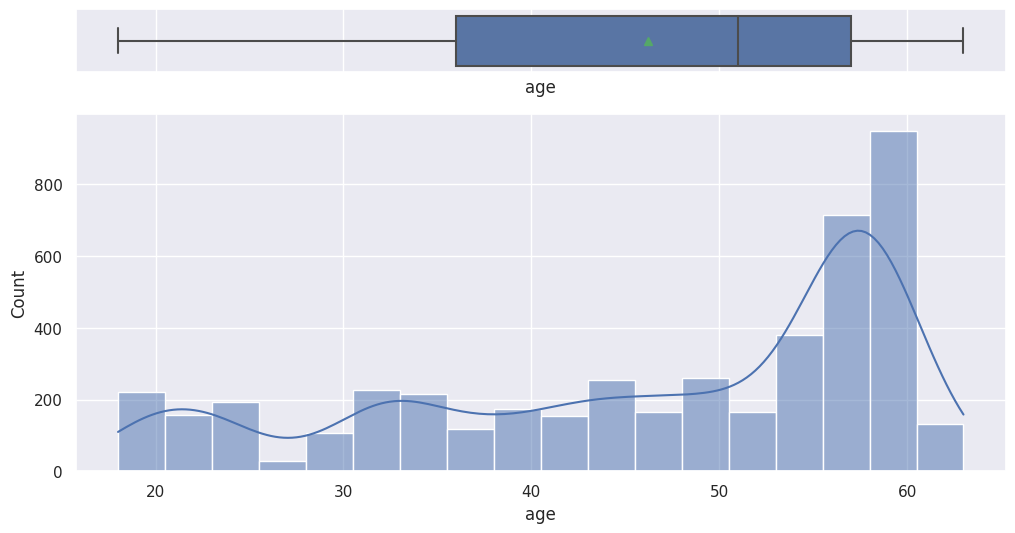

In [ ]:
hist_box(data, 'age')

The age for the leads is left skewed, where the mean is less than the median. The leads tend to be mid-aged people, with the middle 50% between 36 and 57.

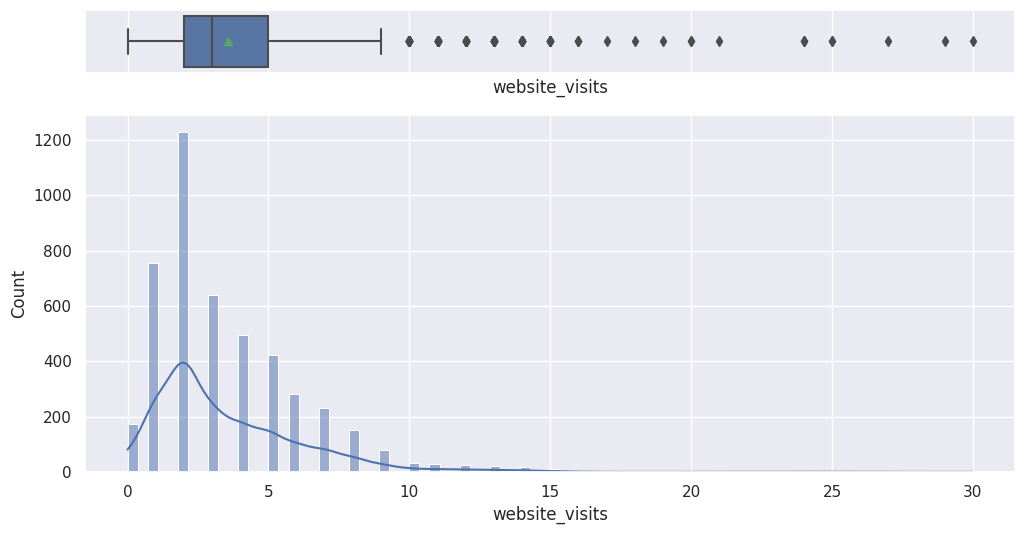

In [ ]:
hist_box(data, 'website_visits')

Website visits is right skewed and has 17 outliers. More than 9 visits are considered outliers.

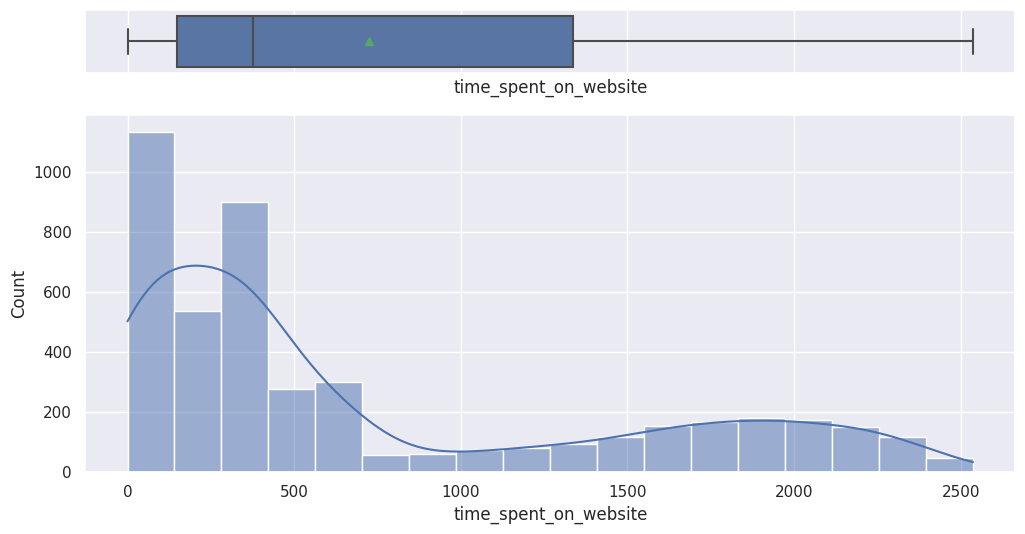

In [ ]:
hist_box(data, 'time_spent_on_website')

Time spent on website is right skewed, with a bimodal shape, where the second peak is much less frequent than the first peak. The second mode could be for those who convert.

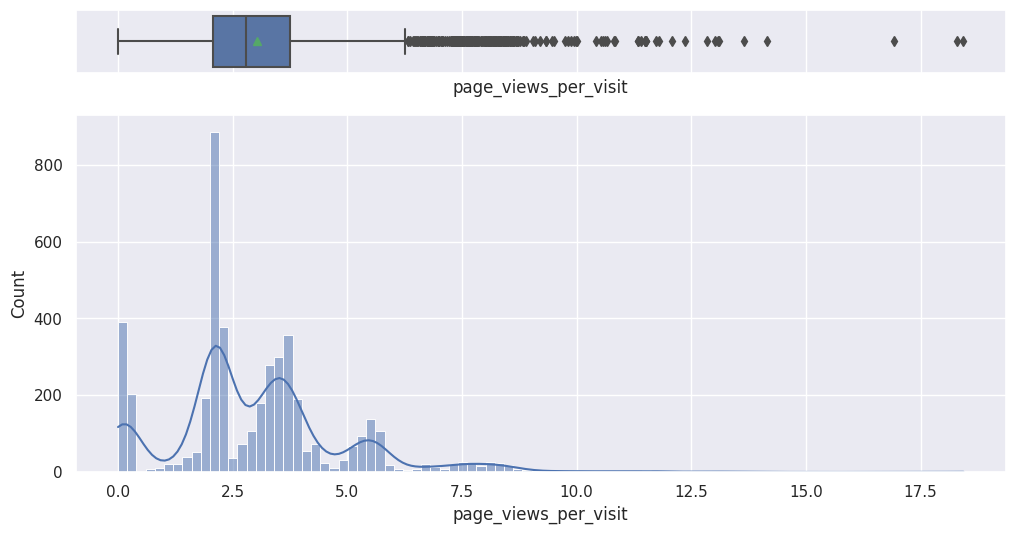

In [ ]:
hist_box(data, 'page_views_per_visit')

Page views per visit has many peaks and outliers. The outlier can be calculated with IQR.

In [ ]:
#Calculate what value marks the outliers
IQR = data['page_views_per_visit'].quantile(0.75) - data['page_views_per_visit'].quantile(0.25)
outlier = data['page_views_per_visit'].quantile(0.75) + 1.5*IQR
outlier

6.273999999999999

Data points with more than 6.27 page views per visit will be considered outliers.

### Observation on categorical variables

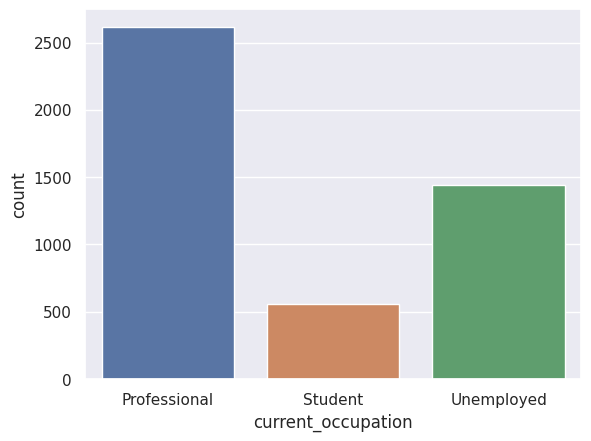

In [ ]:
sns.countplot(x = data['current_occupation'])
plt.show()

Most leads are professional, and the least is student.

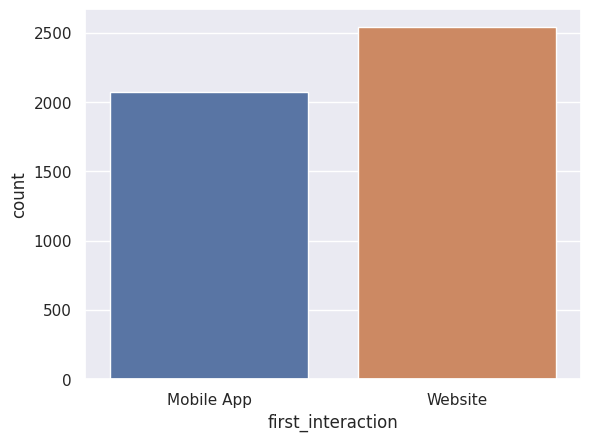

In [ ]:
sns.countplot(x = data['first_interaction'])
plt.show()

More leads interacted through website than mobile app.

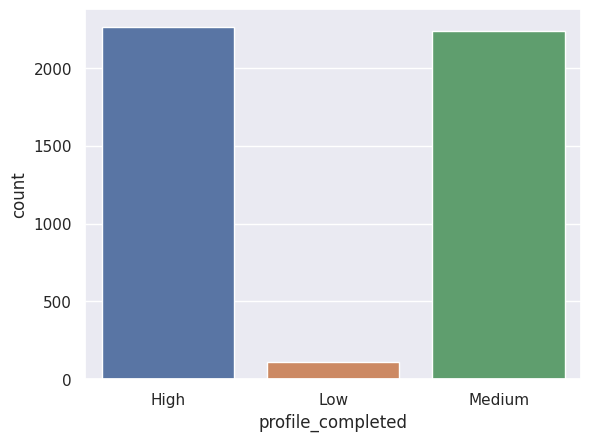

In [ ]:
sns.countplot(x = data['profile_completed'])
plt.show()

The number of leads with medium to high profile completed is about the same, while the number of leads with low profile completed is very small.

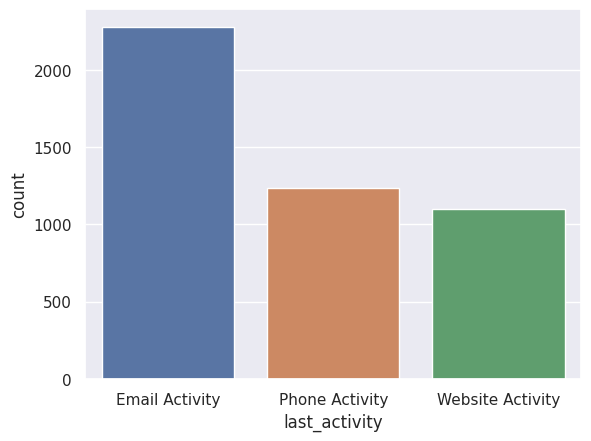

In [ ]:
sns.countplot(x = data['last_activity'])
plt.show()

Most leads' last interaction was through email, then phone, and lastly website.

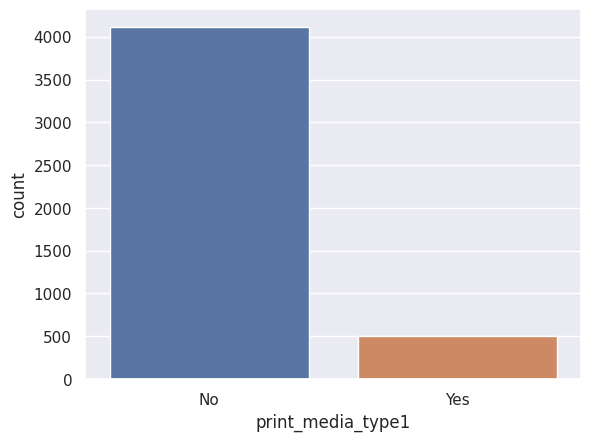

In [ ]:
sns.countplot(x = data['print_media_type1'])
plt.show()

More than 4000 of the leads did not see the ads on newspaper, and only around 500 did.

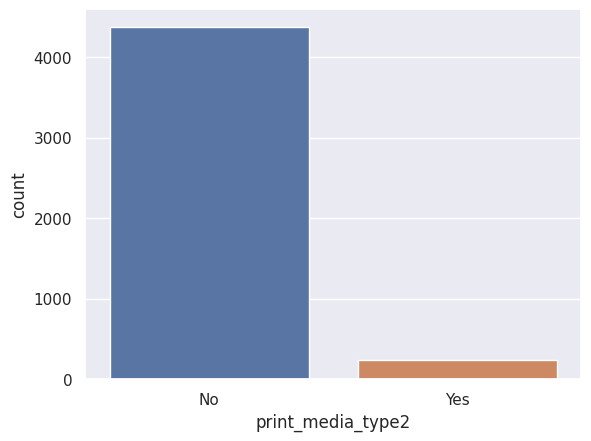

In [ ]:
sns.countplot(x = data['print_media_type2'])
plt.show()

Even less leads have seen the ad on magazines, with about 4500.

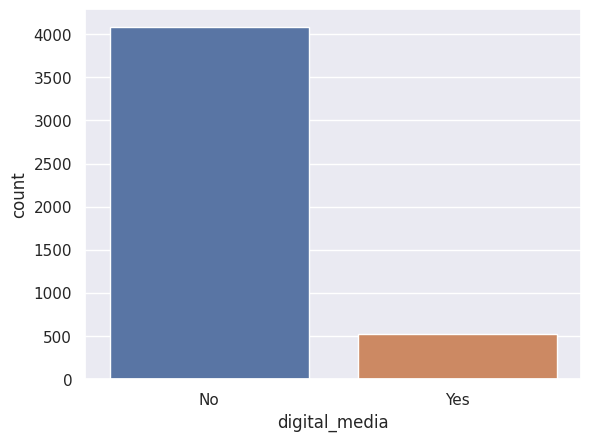

In [ ]:
sns.countplot(x = data['digital_media'])
plt.show()

Same for digital platform, around 500 leads have seen the ad.

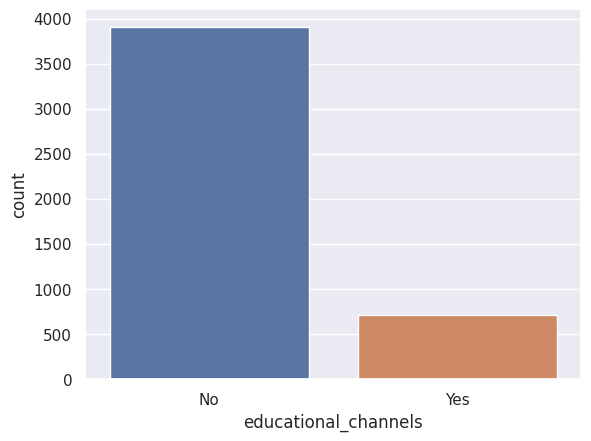

In [ ]:
sns.countplot(x = data['educational_channels'])
plt.show()

More people have heard about ExtraaLearn through educational channels compared to the previous means.

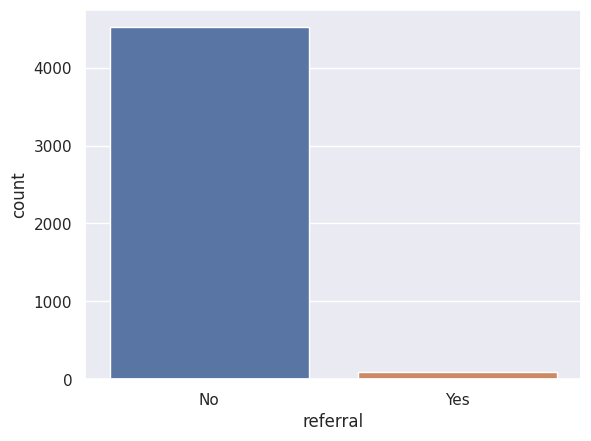

In [ ]:
sns.countplot(x = data['referral'])
plt.show()

Very small number of leads were refered to ExtraaLearn, and most did not have a referral.

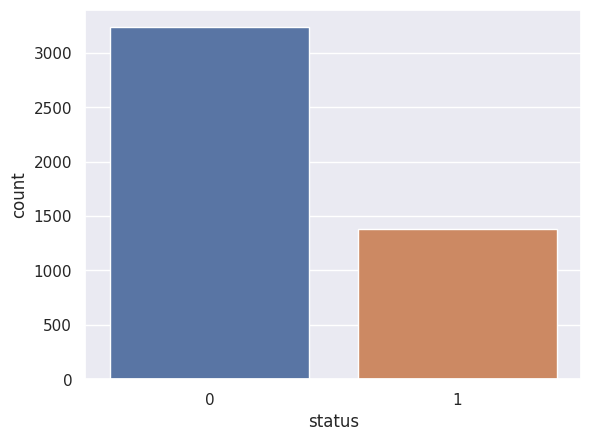

In [ ]:
sns.countplot(x = data['status'])
plt.show()

In [ ]:
data['status'].value_counts(normalize=True)

0    0.701431
1    0.298569
Name: status, dtype: float64

Among all the leads in the dataset, 70% did not convert, and 30% of the leads converted to paid customer.

### Correlation heatmap

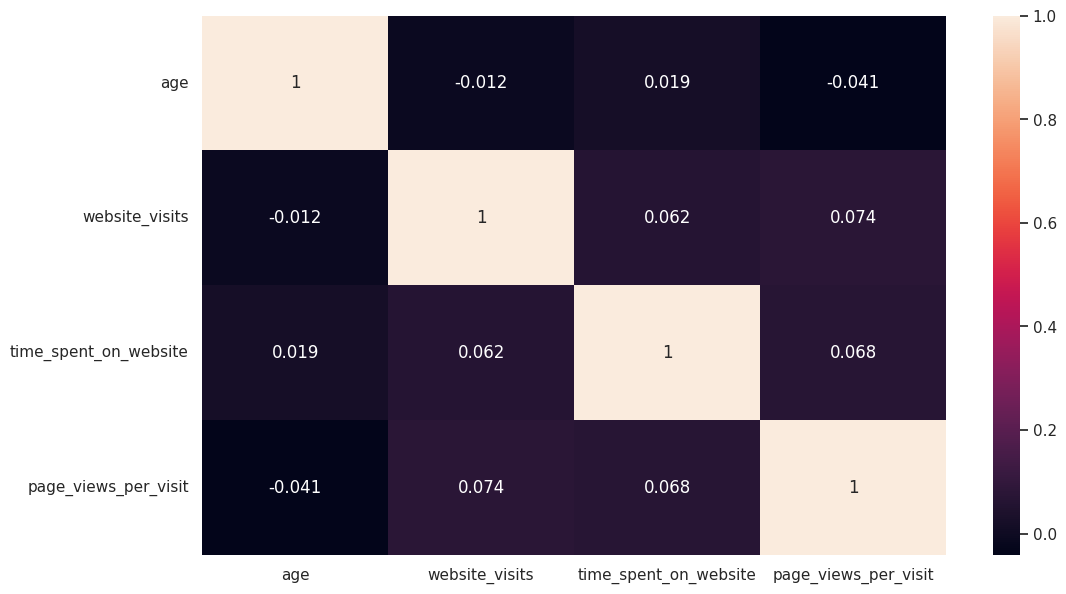

In [ ]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(data[cols_list].corr(), annot = True) #annotation shows the numbers in each box
plt.show()

All continuous variables have very low correlation between each other.

### To answer the questions

In [ ]:
def stacked_barplot(data,predictor,target,figsize=(10,6)):
  (pd.crosstab(data[predictor],data[target],normalize='index')*100).plot(kind='bar',figsize=figsize,stacked=True)
  plt.legend(loc="lower right")
  plt.ylabel(target)

#### 1. How current occupation affects lead status

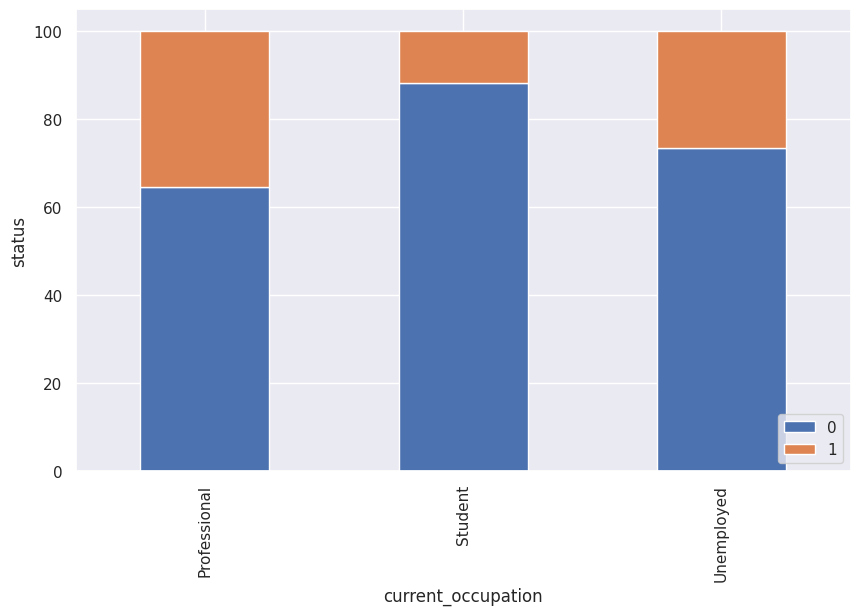

In [ ]:
stacked_barplot(data, 'current_occupation', 'status')

Student is less likely to convert, with conversion rate around 15%.

Perfessional is most likely to convert, with conversion rate of close to 40%.

Unemployed has conversion rate of around 30%.

#### 2. First channels of interaction on status

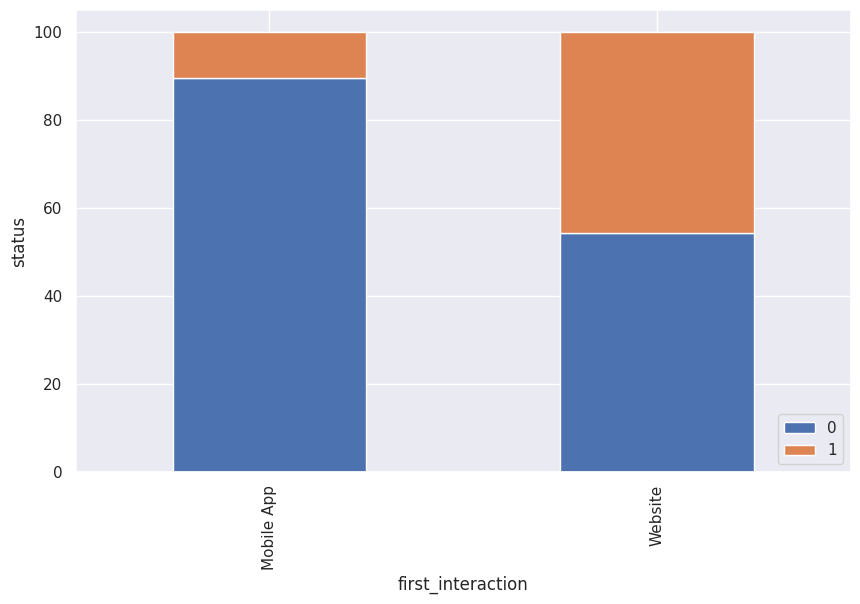

In [ ]:
stacked_barplot(data, 'first_interaction', 'status')

According to the plot, the leads whose first interaction was through the website has a much higher chance of converting than those who first interacted through mobile app.

#### 3. Last activity and status

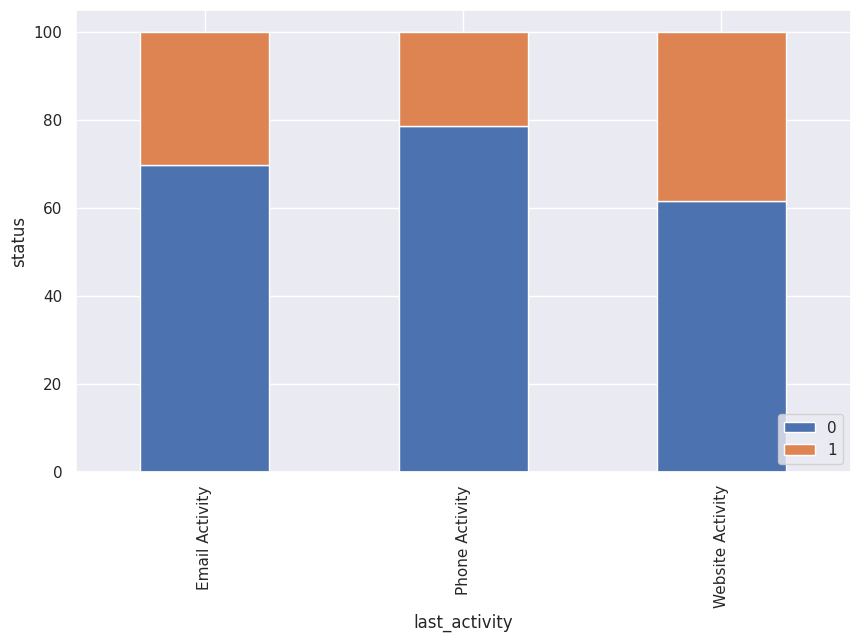

In [ ]:
stacked_barplot(data, 'last_activity', 'status')

Those leads who last interacted on website has the highest conversion rate. Email follows, than phone has the lowest conversion rate.

#### 4. Which channel have the highest lead conversion rate?

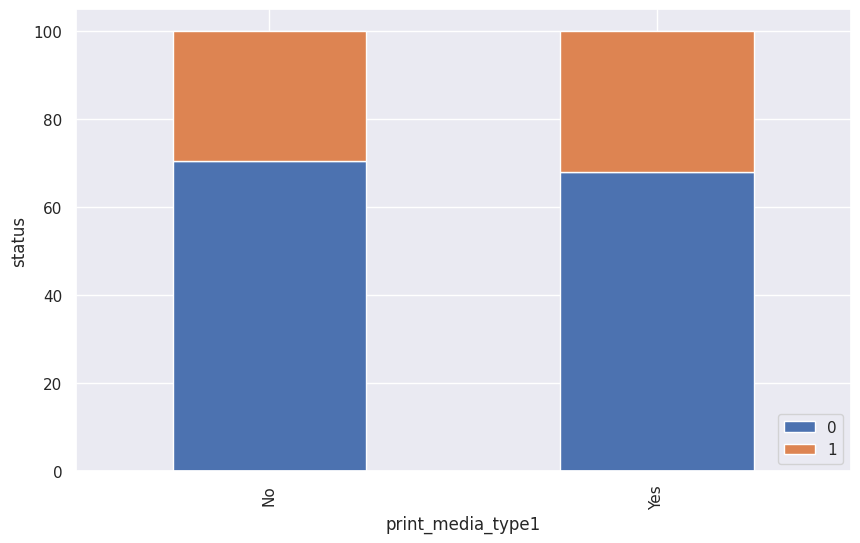

In [ ]:
stacked_barplot(data, 'print_media_type1', 'status')

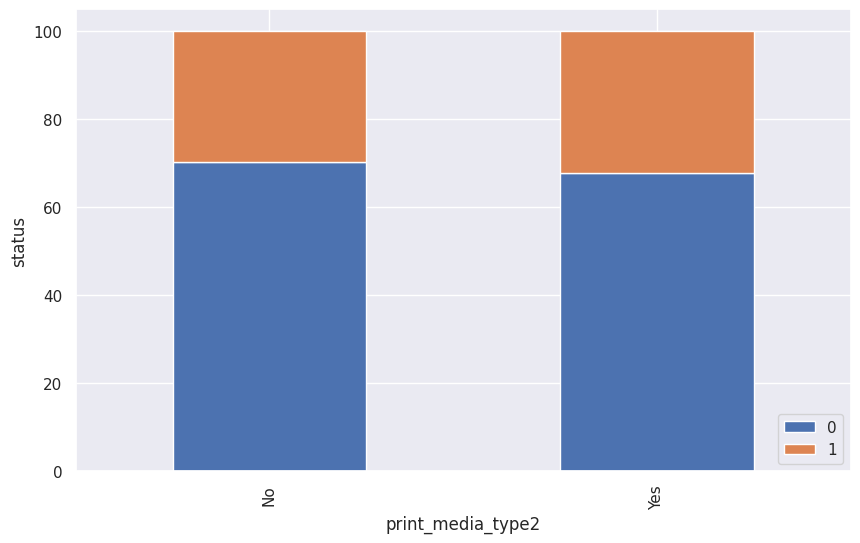

In [ ]:
stacked_barplot(data, 'print_media_type2', 'status')

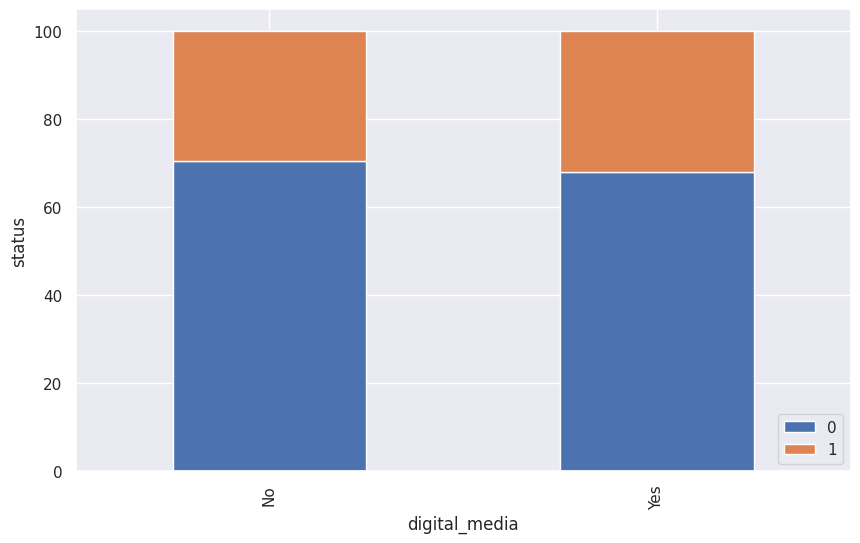

In [ ]:
stacked_barplot(data, 'digital_media', 'status')

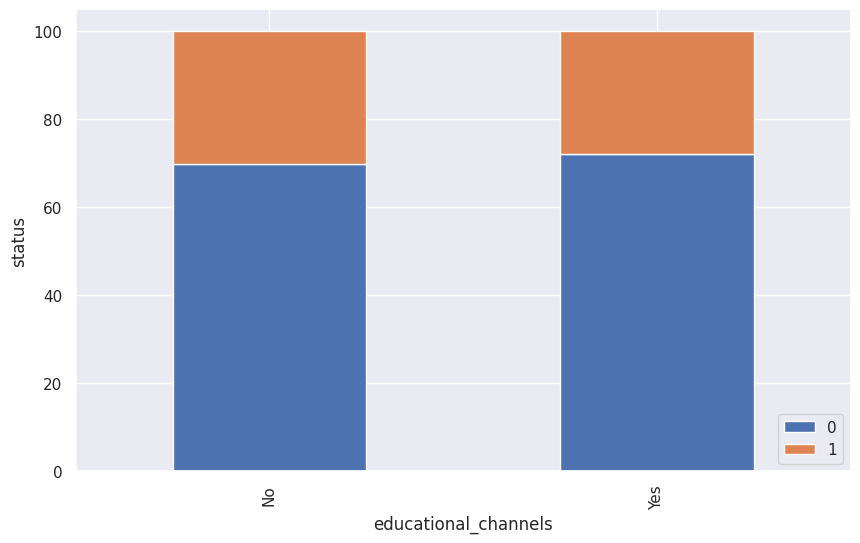

In [ ]:
stacked_barplot(data, 'educational_channels', 'status')

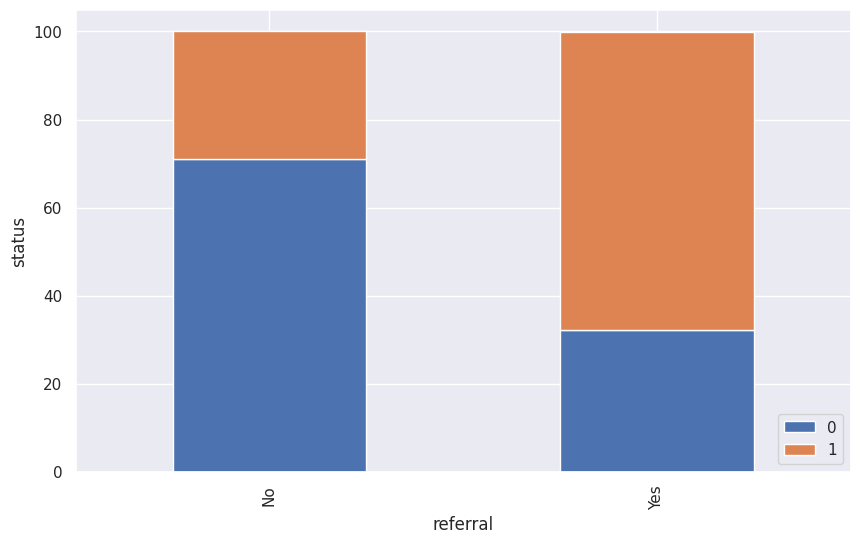

In [ ]:
stacked_barplot(data, 'referral', 'status')

From all the plots above, we can observe that there is not much difference in converting a lead through printed media, digital media, or educational channels. However, whether or not the lead is referred shows a great impact on whether they convert or not.

#### 5. Profile completence vs status

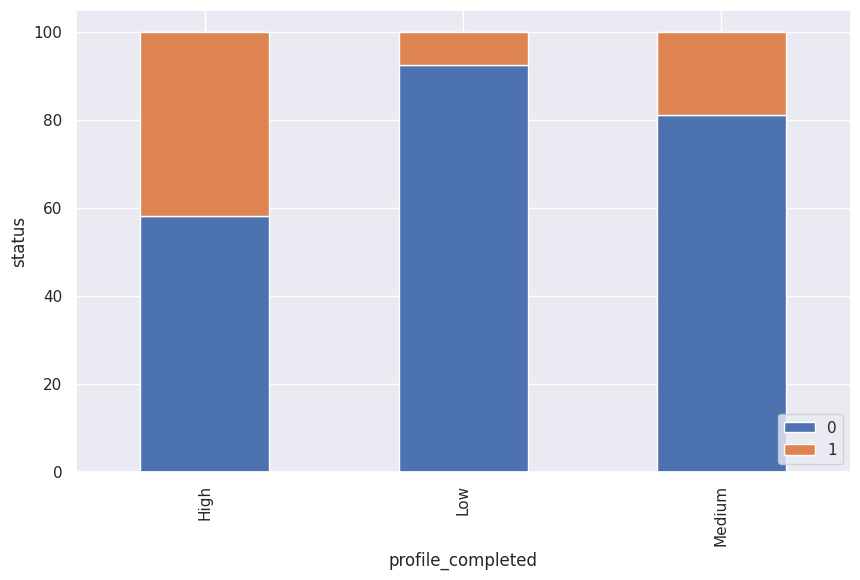

In [ ]:
stacked_barplot(data, 'profile_completed', 'status')

Having more details about the lead does show a higher chance of converting the lead to paid customer.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
#Cleaning the outliers from the dataset
data.drop(index=data[data.website_visits>9].index,inplace=True)
data.drop(index=data[data.page_views_per_visit>outlier].index,inplace=True)

In [ ]:
#changing status back to int
data['status']=data['status'].astype('float')

In [ ]:
#Seperating target variable
X=data.drop(columns='status')
Y=data['status']

Since I believe all variables can be meaningful to predicting the status, I will keep all of them when building the model.

In [ ]:
#Splitting the data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=1,stratify=Y)

In [ ]:
#Encoding categorical variables
X_train=pd.get_dummies(X_train, columns=cat_col[:-1], drop_first=True)
X_test=pd.get_dummies(X_test, columns=cat_col[:-1], drop_first=True)

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [ ]:
X_train.head()

,age,website_visits,time_spent_on_website,page_views_per_visit,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_Yes,print_media_type2_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
3635,57,1,26,2.192,0,0,1,0,0,0,0,1,1,1,0,0
2797,63,5,358,3.601,0,1,0,0,0,0,0,0,0,0,0,1
150,38,2,99,3.704,0,0,0,0,1,1,0,0,0,0,0,0
3568,21,2,200,2.172,1,0,1,0,1,0,1,0,0,0,0,0
3527,48,9,1703,0.243,0,0,1,0,1,0,0,0,0,1,0,0


The categorical variables are converted to dummy variables.

In [ ]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,2945.0,46.268591,13.062488,18.0,36.000,51.000,57.00,63.000
website_visits,2945.0,3.230900,2.181707,0.0,2.000,3.000,5.00,9.000
time_spent_on_website,2945.0,715.866553,743.972843,0.0,124.000,375.000,1306.00,2537.000
page_views_per_visit,2945.0,2.722261,1.498257,0.0,2.062,2.284,3.64,6.266
current_occupation_Student,2945.0,0.118166,0.322860,0.0,0.000,0.000,0.00,1.000
current_occupation_Unemployed,2945.0,0.312394,0.463548,0.0,0.000,0.000,1.00,1.000
first_interaction_Website,2945.0,0.542275,0.498294,0.0,0.000,1.000,1.00,1.000
profile_completed_Low,2945.0,0.023090,0.150215,0.0,0.000,0.000,0.00,1.000
profile_completed_Medium,2945.0,0.481154,0.499730,0.0,0.000,0.000,1.00,1.000
last_activity_Phone Activity,2945.0,0.262818,0.440239,0.0,0.000,0.000,1.00,1.000


In [ ]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1263.0,46.575614,13.121356,18.0,36.0000,52.000,57.0000,63.000
website_visits,1263.0,3.232779,2.101536,0.0,2.0000,3.000,5.0000,9.000
time_spent_on_website,1263.0,724.294537,739.823587,0.0,183.5000,376.000,1319.5000,2531.000
page_views_per_visit,1263.0,2.701620,1.474412,0.0,2.0565,2.292,3.6475,6.119
current_occupation_Student,1263.0,0.110847,0.314067,0.0,0.0000,0.000,0.0000,1.000
current_occupation_Unemployed,1263.0,0.322249,0.467523,0.0,0.0000,0.000,1.0000,1.000
first_interaction_Website,1263.0,0.579572,0.493823,0.0,0.0000,1.000,1.0000,1.000
profile_completed_Low,1263.0,0.022961,0.149839,0.0,0.0000,0.000,0.0000,1.000
profile_completed_Medium,1263.0,0.486144,0.500006,0.0,0.0000,0.000,1.0000,1.000
last_activity_Phone Activity,1263.0,0.266033,0.442057,0.0,0.0000,0.000,1.0000,1.000


In [ ]:
y_train.value_counts(normalize=True)

0.0    0.698472
1.0    0.301528
Name: status, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

0.0    0.698337
1.0    0.301663
Name: status, dtype: float64

The train and test data sets have about the same summary statistics, indicating the split was random.

We are good to build the model.

## Building a Decision Tree model

In [ ]:
#define the metric function provided in the practice project
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [ ]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2057
         1.0       1.00      1.00      1.00       888

    accuracy                           1.00      2945
   macro avg       1.00      1.00      1.00      2945
weighted avg       1.00      1.00      1.00      2945



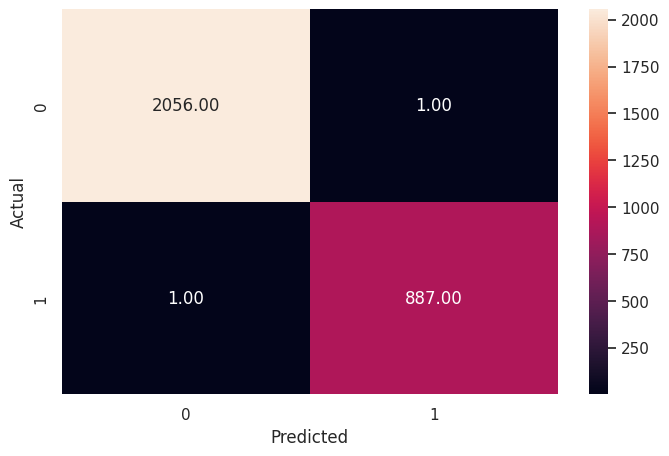

In [ ]:
#checking the performance on train data
pred_train_dt = dt.predict(X_train)
metrics_score(y_train, pred_train_dt)

The train data seems very well predicted by the model, only 2 data points are mis-predicted.

              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87       882
         1.0       0.70      0.69      0.69       381

    accuracy                           0.82      1263
   macro avg       0.78      0.78      0.78      1263
weighted avg       0.82      0.82      0.82      1263



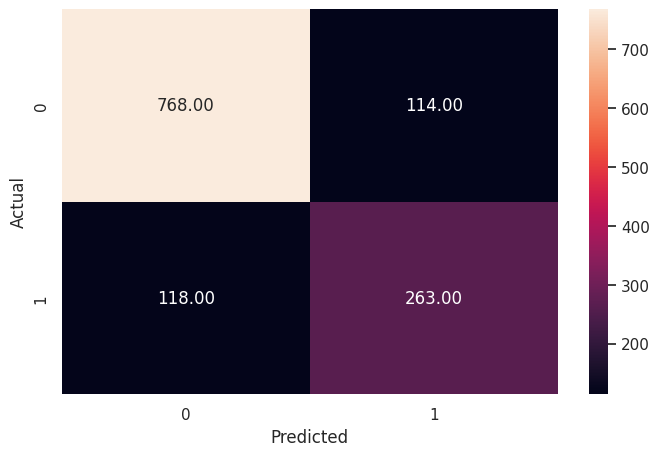

In [ ]:
#performance on test data
pred_test_dt = dt.predict(X_test)
metrics_score(y_test, pred_test_dt)

The model is definitely overfitting, since the test set is doing much poorer than the training set.

## Do we need to prune the tree?

Since the model shows much better performance with the training data, it means the model is overfitting, and we do need to prune the tree.

In [ ]:
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(1, 100, 10),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}


# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, cv=5,scoring='recall',n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=21, max_leaf_nodes=50, min_samples_split=30,
                       random_state=1)

              precision    recall  f1-score   support

         0.0       0.91      0.94      0.92      2057
         1.0       0.85      0.78      0.81       888

    accuracy                           0.89      2945
   macro avg       0.88      0.86      0.87      2945
weighted avg       0.89      0.89      0.89      2945



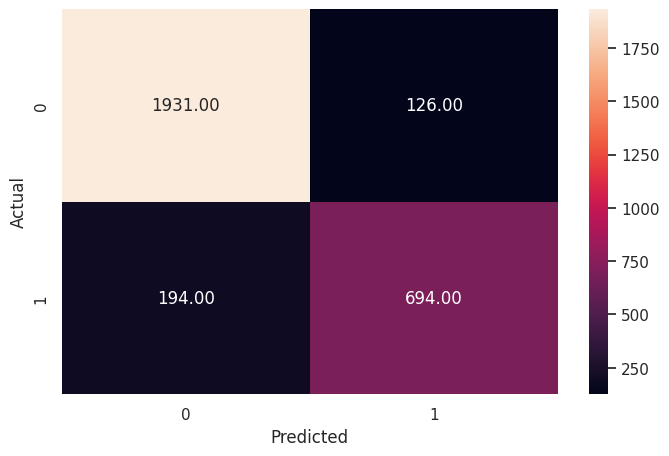

In [ ]:
dt_tuned = estimator.predict(X_train)
metrics_score(y_train, dt_tuned)

              precision    recall  f1-score   support

         0.0       0.89      0.90      0.89       882
         1.0       0.76      0.74      0.75       381

    accuracy                           0.85      1263
   macro avg       0.82      0.82      0.82      1263
weighted avg       0.85      0.85      0.85      1263



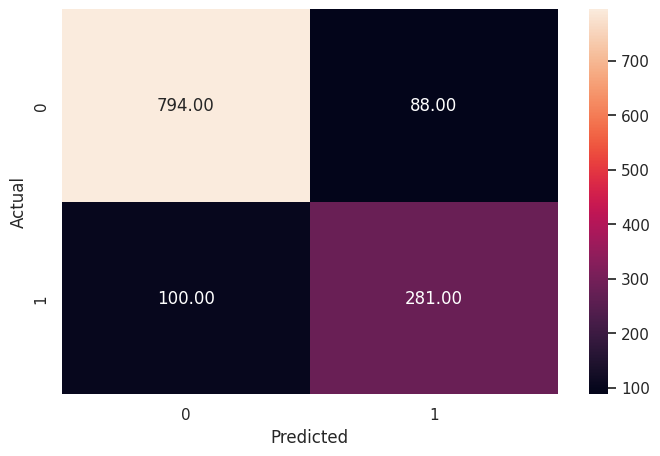

In [ ]:
y_pred_tuned = estimator.predict(X_test)
metrics_score(y_test,y_pred_tuned)

The model is not overfitted now, and has a good balance between recall and precision score.

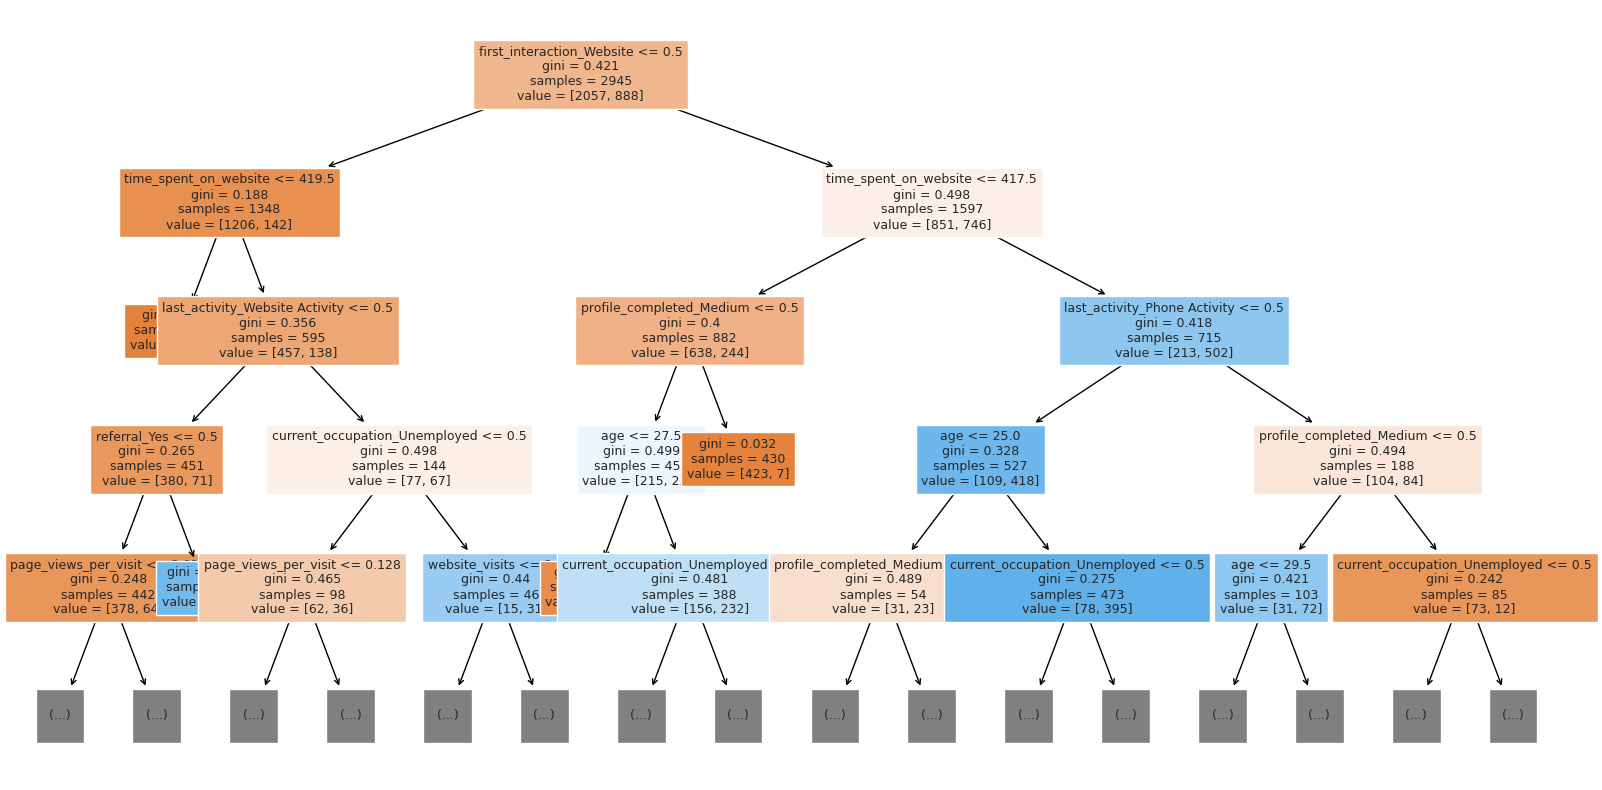

In [ ]:
#visualize the tree (borrowed from practice project)
feature_names = list(X_train.columns)
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    max_depth=4,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

## Building a Random Forest model

In [ ]:
rf_estimator = RandomForestClassifier( random_state = 1)
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2057
         1.0       1.00      1.00      1.00       888

    accuracy                           1.00      2945
   macro avg       1.00      1.00      1.00      2945
weighted avg       1.00      1.00      1.00      2945



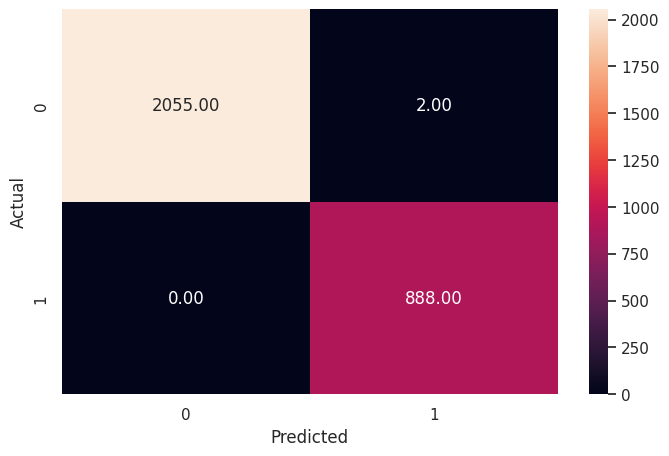

In [ ]:
y_pred_train_rf = rf_estimator.predict(X_train)
metrics_score(y_train, y_pred_train_rf)

The model has performed well on the training data, where only 2 are mis-predicted.

              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90       882
         1.0       0.78      0.75      0.77       381

    accuracy                           0.86      1263
   macro avg       0.84      0.83      0.83      1263
weighted avg       0.86      0.86      0.86      1263



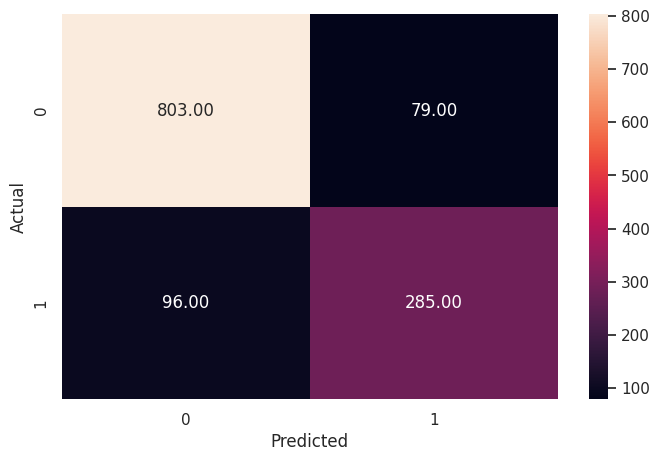

In [ ]:
y_pred_test_rf = rf_estimator.predict(X_test)
metrics_score(y_test, y_pred_test_rf)

The model is overfitting again, since the test data produced a lot more errors than the training data did.

## Do we need to prune the tree?

Yes, since the model has overfitted. But according to my knowledge, we do not prune a random forest model.

## Actionable Insights and Recommendations

**Recommendations:**

Perfessional is most likely to convert, with conversion rate of close to 40%. The company should reach out to perfessionals more.

The leads whose first interaction was through the website has a much higher chance of converting than those who first interacted through mobile app. I would suggest the company make their website more attractive, and easier to find for more people.

There is not much difference in converting a lead through printed media, digital media, or educational channels. However, whether or not the lead is referred shows a great impact on whether they convert or not. The company could focus less on the above channels, and focus more on getting current paid customers to refer ExtraaLearn to others, perhaps by giving credits, rewards, or other gifts.

Having more details about the lead does show a higher chance of converting the lead to paid customer. The company should encourage the leads to complete their profiles more.

**Predictive model:**

Among all the models built above, the pruned decision tree model has the best performance with least overfitting. It has a recall score of 0.74, which means 74% of the time, the lead is correctly predicted to convert.